In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude

from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

630

# Retrieve City Weather Data

In [6]:
# Import dependencies

from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 toS the record count
    record_count += 1


# Run an API request for each of the cites 
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | zhanaozen
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | ulety
Processing Record 5 of Set 1 | abong mbang
Processing Record 6 of Set 1 | bargal
City not found. Skipping...
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | sept-iles
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | kijang
Processing Record 12 of Set 1 | san carlos de bariloche
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 1 | kavieng
Processing Record 15 of Set 1 | isangel
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | rungata
City not found. Skipping...
Processing Record 20 of Set 1 | mattawa
Processing Record 21 of S

Processing Record 38 of Set 4 | amderma
City not found. Skipping...
Processing Record 39 of Set 4 | waddan
Processing Record 40 of Set 4 | kadyy
Processing Record 41 of Set 4 | nome
Processing Record 42 of Set 4 | dehloran
Processing Record 43 of Set 4 | port hardy
Processing Record 44 of Set 4 | mandalgovi
Processing Record 45 of Set 4 | burns lake
Processing Record 46 of Set 4 | victoria
Processing Record 47 of Set 4 | bethel
Processing Record 48 of Set 4 | potamia
Processing Record 49 of Set 4 | forbes
Processing Record 50 of Set 4 | soria
Processing Record 1 of Set 5 | dudinka
Processing Record 2 of Set 5 | saskylakh
Processing Record 3 of Set 5 | powell river
Processing Record 4 of Set 5 | taoudenni
Processing Record 5 of Set 5 | mapastepec
Processing Record 6 of Set 5 | takoradi
Processing Record 7 of Set 5 | hay river
Processing Record 8 of Set 5 | muroto
Processing Record 9 of Set 5 | nanortalik
Processing Record 10 of Set 5 | katsuura
Processing Record 11 of Set 5 | merritt
Pr

City not found. Skipping...
Processing Record 29 of Set 8 | bambous virieux
Processing Record 30 of Set 8 | westport
Processing Record 31 of Set 8 | zhangjiakou
Processing Record 32 of Set 8 | klaksvik
Processing Record 33 of Set 8 | nizhniy baskunchak
Processing Record 34 of Set 8 | sainte-thecle
Processing Record 35 of Set 8 | kloulklubed
Processing Record 36 of Set 8 | doctor mora
Processing Record 37 of Set 8 | pavagada
Processing Record 38 of Set 8 | roma
Processing Record 39 of Set 8 | gorelki
Processing Record 40 of Set 8 | mayumba
Processing Record 41 of Set 8 | danshui
Processing Record 42 of Set 8 | turukhansk
Processing Record 43 of Set 8 | galgani
City not found. Skipping...
Processing Record 44 of Set 8 | indramayu
Processing Record 45 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 46 of Set 8 | arroyo
Processing Record 47 of Set 8 | portland
Processing Record 48 of Set 8 | floro
Processing Record 49 of Set 8 | cascais
Processing Record 50 of Set 8 | nann

Processing Record 15 of Set 12 | ambulu
Processing Record 16 of Set 12 | tawau
Processing Record 17 of Set 12 | kupang
Processing Record 18 of Set 12 | towada
Processing Record 19 of Set 12 | wajid
Processing Record 20 of Set 12 | stoyba
City not found. Skipping...
Processing Record 21 of Set 12 | malyn
Processing Record 22 of Set 12 | manado
Processing Record 23 of Set 12 | chardara
Processing Record 24 of Set 12 | turayf
Processing Record 25 of Set 12 | viligili
City not found. Skipping...
Processing Record 26 of Set 12 | roebourne
Processing Record 27 of Set 12 | massakory
Processing Record 28 of Set 12 | orange cove
Processing Record 29 of Set 12 | puerto madryn
Processing Record 30 of Set 12 | salinas
Processing Record 31 of Set 12 | yalta
Processing Record 32 of Set 12 | khanpur
Processing Record 33 of Set 12 | college
Processing Record 34 of Set 12 | zhangye
Processing Record 35 of Set 12 | bogorodskoye
Processing Record 36 of Set 12 | bemidji
Processing Record 37 of Set 12 | ra

In [8]:
len(city_data)

579

In [9]:
# Convert the array of dictionaries into a Pandas data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,48.18,48,73,15.05,RU,2022-07-19 06:47:49
1,Zhanaozen,43.3000,52.8000,104.25,11,0,14.76,KZ,2022-07-19 06:47:49
2,Hermanus,-34.4187,19.2345,52.81,72,98,3.91,ZA,2022-07-19 06:47:50
3,Ulety,51.3572,112.4849,84.78,34,81,6.62,RU,2022-07-19 06:47:50
4,Abong Mbang,3.9833,13.1833,69.08,88,100,4.38,CM,2022-07-19 06:47:50
5,Cidreira,-30.1811,-50.2056,53.19,92,100,6.31,BR,2022-07-19 06:41:12
6,Sept-Iles,50.2001,-66.3821,61.05,91,40,6.91,CA,2022-07-19 06:45:42
7,Yellowknife,62.4560,-114.3525,64.92,72,75,5.75,CA,2022-07-19 06:47:51
8,Thompson,55.7435,-97.8558,60.96,88,40,3.44,CA,2022-07-19 06:46:36
9,Kijang,35.2442,129.2139,83.93,82,47,5.97,KR,2022-07-19 06:41:03


In [10]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2022-07-19 06:47:49,70.6333,147.9167,48.18,48,73,15.05
1,Zhanaozen,KZ,2022-07-19 06:47:49,43.3000,52.8000,104.25,11,0,14.76
2,Hermanus,ZA,2022-07-19 06:47:50,-34.4187,19.2345,52.81,72,98,3.91
3,Ulety,RU,2022-07-19 06:47:50,51.3572,112.4849,84.78,34,81,6.62
4,Abong Mbang,CM,2022-07-19 06:47:50,3.9833,13.1833,69.08,88,100,4.38
5,Cidreira,BR,2022-07-19 06:41:12,-30.1811,-50.2056,53.19,92,100,6.31
6,Sept-Iles,CA,2022-07-19 06:45:42,50.2001,-66.3821,61.05,91,40,6.91
7,Yellowknife,CA,2022-07-19 06:47:51,62.4560,-114.3525,64.92,72,75,5.75
8,Thompson,CA,2022-07-19 06:46:36,55.7435,-97.8558,60.96,88,40,3.44
9,Kijang,KR,2022-07-19 06:41:03,35.2442,129.2139,83.93,82,47,5.97


In [11]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [12]:
# Extract relevant fields from the data frame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# Plotting Weather Data

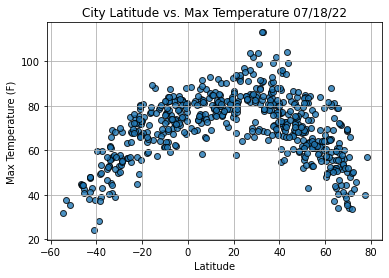

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

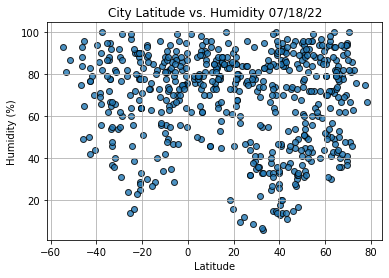

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()

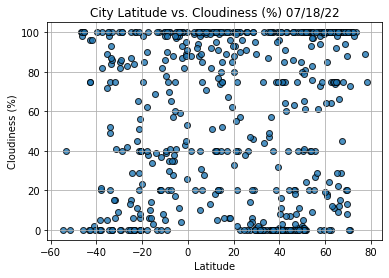

In [24]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

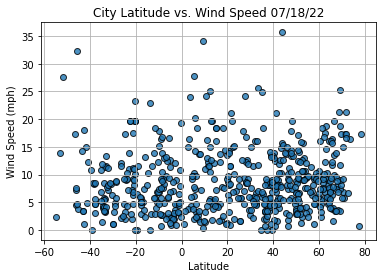

In [16]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()

# Determining Correlation

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line with the equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere data frames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2022-07-19 06:47:49,70.6333,147.9167,48.18,48,73,15.05
1,Zhanaozen,KZ,2022-07-19 06:47:49,43.3000,52.8000,104.25,11,0,14.76
3,Ulety,RU,2022-07-19 06:47:50,51.3572,112.4849,84.78,34,81,6.62
4,Abong Mbang,CM,2022-07-19 06:47:50,3.9833,13.1833,69.08,88,100,4.38
6,Sept-Iles,CA,2022-07-19 06:45:42,50.2001,-66.3821,61.05,91,40,6.91


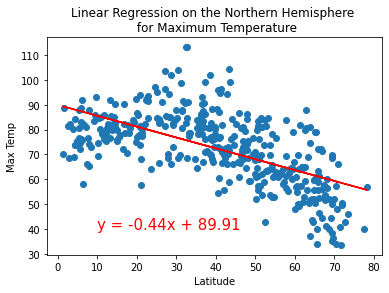

In [33]:
# Linear regression on the Northern Hemisphere (Max Temp)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (10,40))

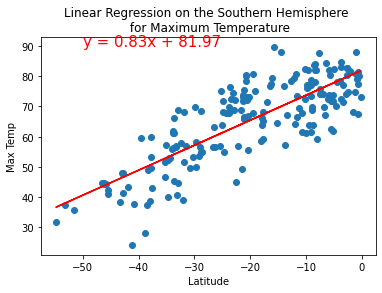

In [32]:
# Linear regression on the Southern Hemisphere (Max Temp)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (-50,90))

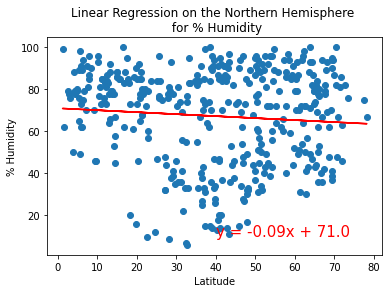

In [39]:
# Linear regression on the Northern Hemisphere (Humidity)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (40,10))

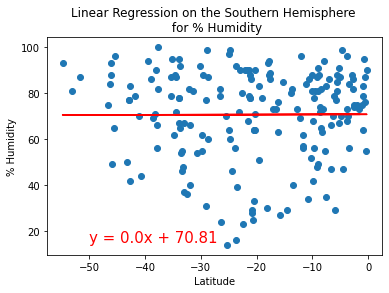

In [35]:
# Linear regression on the Southern Hemisphere (Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-50,15))

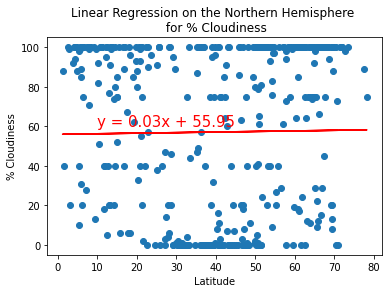

In [37]:
# Linear regression on the Northern Hemisphere (Cloudiness)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (10,60))

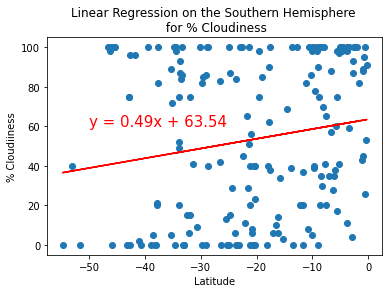

In [38]:
# Linear regression on the Southern Hemisphere (Cloudiness)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiiness', (-50,60))

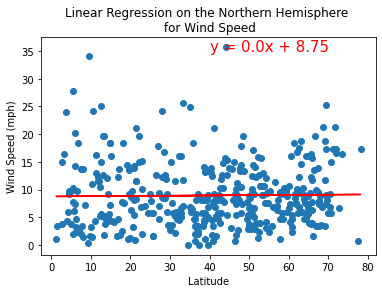

In [41]:
# Linear regression on the Northern Hemisphere (Windspeed)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed (mph)', (40,35))

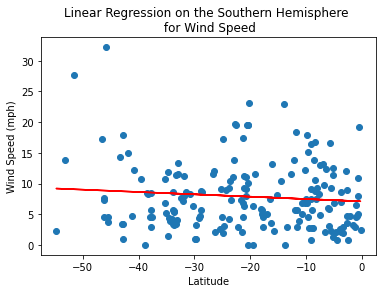

In [42]:
# Linear regression on the Southern Hemisphere (Windspeed)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed (mph)', (-50,35))